In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Link of dataset: https://www.kaggle.com/datasets/vihansp/salary-data

**Retrieve the data**

In [2]:
#charger les données
data=pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


**Preparing data**

In [6]:
x=data['YearsExperience']
y=data['Salary']

In [10]:
x.shape
y.shape

(30,)

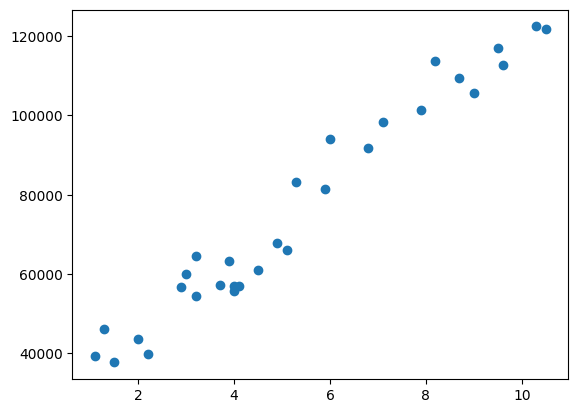

In [11]:
plt.scatter(x,y)

In [16]:
#séparer base de donné en train et test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)

**Build and train model**

In [18]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train.values.reshape(-1, 1),y_train)

LinearRegression()

In [21]:
#voir les parametres
print(regressor.intercept_)
print(regressor.coef_)

26816.192244031183
[9345.94244312]


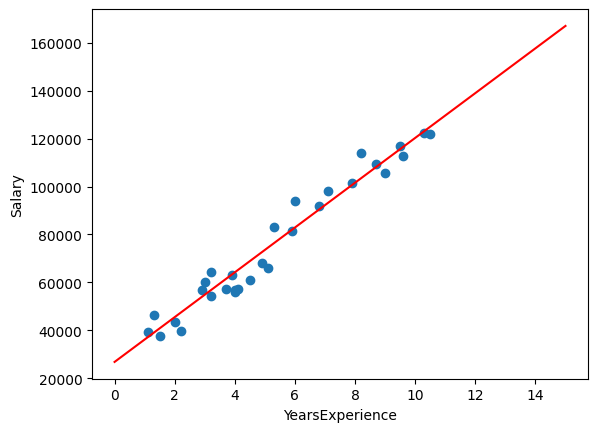

In [22]:
#ajouter sur le graphique la droite
ordonne=np.linspace(0,15,1000)
#calcule F(x) les valeur predire et la representer
abscisse=regressor.coef_*ordonne+regressor.intercept_
plt.plot(ordonne,abscisse,color='red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.scatter(x,y)

**Evaluate**

In [24]:
#predictions sur la base test
y_pred=regressor.predict(x_test.values.reshape(-1, 1))

In [25]:
#Metrique
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2:',metrics.r2_score(y_test,y_pred))

MAE: 3426.4269374307078
MSE: 21026037.329511296
RMSE: 4585.4157204675885
R2: 0.9749154407708353


In [26]:
#tester pour nouvelle donner
new=[[5],[4]]
newtest=pd.DataFrame(new,columns=['new data'])
y_new=regressor.predict(newtest)
print(y_new)

[73545.90445964 64199.96201652]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
